In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [86]:
df_tips = sns.load_dataset('tips')

df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [87]:
x = df_tips['total_bill']

y = df_tips['tip']

print(x)
print(y)

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64
0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64


In [88]:
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           6.69e-34
Time:                        21:17:36   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
xb = df_tips["total_bill"]

xb[2]

y[2]

np.float64(3.5)

In [90]:
df_tips = pd.get_dummies(df_tips, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

In [91]:
x = df_tips[['total_bill', 'sex_Female', 'smoker_No', 'day_Fri', 'day_Sat', 'day_Sun']]
y = df_tips['tip']

x=x.astype(int)

x=sm.add_constant(x)

model= sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     33.85
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           2.19e-29
Time:                        21:17:36   Log-Likelihood:                -349.44
No. Observations:                 244   AIC:                             712.9
Df Residuals:                     237   BIC:                             737.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8282      0.236      3.512      0.0

gorgeta = 0.82 + 90* 0.1056


In [92]:
tamanho = 1000
df = pd.DataFrame({"x": np.random.randint(100, 1000, size=tamanho),
                   "y": np.random.poisson(lam=1.5, size=tamanho)})

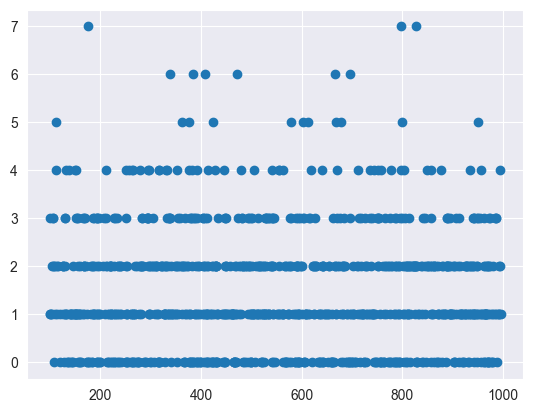

In [93]:
plt.scatter(df['x'], df['y'])
plt.show()

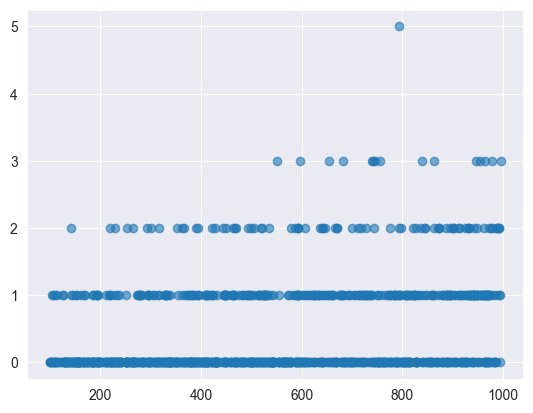

In [94]:
beta0 = -2
beta1 = 0.002
df['lambda'] = np.exp(beta0 + beta1 * df['x'])

df['y'] = np.random.poisson(lam=df['lambda'])

plt.scatter(df['x'], df['y'], alpha=0.6)
plt.show()

In [95]:
x = sm.add_constant(df['x'])
y = df['y']
print(x)

     const    x
0      1.0  185
1      1.0  154
2      1.0  316
3      1.0  169
4      1.0  700
..     ...  ...
995    1.0  750
996    1.0  695
997    1.0  142
998    1.0  447
999    1.0  562

[1000 rows x 2 columns]


In [96]:
model = sm.GLM(y, x, family=sm.families.Poisson()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      998
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -875.12
Date:                Mon, 10 Mar 2025   Deviance:                       948.01
Time:                        21:17:37   Pearson chi2:                     997.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.08360
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7460      0.129    -13.487      0.0

In [107]:
tamanho = 1000
df = pd.DataFrame({"x": np.random.randint(100, 1000, size=tamanho),
                   "chuva": np.random.choice([0, 1], size=tamanho, p = [0.7, 0.3]) })

beta0 = -2
beta1 = 0.002
beta2 = 0.5
df['lambda'] = np.exp(beta0 + beta1 * df['x'] + df['chuva'] * beta2 )
df['y'] = np.random.poisson(lam=df['lambda'])

x=sm.add_constant(df[['x', 'chuva']])
y = df['y']

model = sm.GLM(y, x, family=sm.families.Poisson()).fit()
print(model.summary())
print(x)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      997
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -936.64
Date:                Mon, 10 Mar 2025   Deviance:                       962.39
Time:                        21:27:49   Pearson chi2:                     996.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1474
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8833      0.128    -14.669      0.0